In [1]:
import numpy as np
# import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import utils
import time
import random
import pickle

Random shortest path from 68 to 56: [68, 37, 42, 56], with distance 3


In [2]:
n_trials = 10000
n_graphs = 5
c = 2
Ns = [2**i for i in range(5,10)]
stats_names = ['Hyperbolicity', 'Slimness     ', 'Thinness     ', 'Minsize      ', 'Insize       ']
avg_results = {}
frac_results = {}
start_time = time.time()
np.random.seed(369)
for n in Ns:
    print("# of vertices = ", n)
    avg_bkp = np.zeros((n_graphs, 5))
    frac_bkp = np.zeros((n_graphs, 5))
    for iter in range(n_graphs):
        # G = nx.random_regular_graph(d, n)
        # while nx.is_connected(G) == False:
        #     # print("is disconnected, resample")
        #     G = nx.random_regular_graph(d, n)
        # G = nx.convert_node_labels_to_integers(G)
        # D = nx.floyd_warshall_numpy(G)
        p = c / n
        ER = nx.erdos_renyi_graph(n, p)
        G = utils.get_giant_component(ER)
        G = nx.convert_node_labels_to_integers(G)
        D = nx.floyd_warshall_numpy(G)
        delta_sum = 0
        zeta_sum = 0
        tau_sum = 0
        eta_sum = 0
        iota_sum = 0
        stat_sums = np.zeros(5)
        frac_sums = np.zeros(5)
        r = random.sample(list(G.nodes), 1)
        for i in range(n_trials):
            x,y,z = random.sample(list(G.nodes), 3)
            normalizer = max(1, D[x,y], D[y,z], D[z,x])
            zeta, tau, eta, iota = utils.compute_triangle_stats(G,x,y,z,D)
            delta = utils.compute_fourpoint_condition(D,x,y,z,r)[0]
            # print(delta, "\t", zeta, "\t", eta, "\t", iota)
            triangle_stats = np.array([delta, zeta, tau, eta, iota])
            # delta_sum += delta
            # zeta_sum += zeta
            # tau_sum += tau
            # eta_sum += eta
            # iota_sum += iota
            stat_sums += triangle_stats
            frac_sums += triangle_stats / normalizer
            # print(type(delta))
        print(f"{iter+1}th random graph", time.time() - start_time)
        # for j in range(5):
        #     print("Average   ", stats_names[j], "\t = ", stat_sums[j] / n_trials)
        #     print("Fractional", stats_names[j], "\t = ", frac_sums[j] / n_trials)
        #     print("Time:", time.time() - start_time)
        avg_bkp[iter] = stat_sums / n_trials
        frac_bkp[iter] = frac_sums / n_trials
    # print("Average Hyperbolicity: ", delta_sum / n_trials)
    # print("Average Slimness: ", zeta_sum / n_trials)
    # print("Average Thinness: ", tau_sum / n_trials)
    # print("Average Minsize: ", eta_sum / n_trials)
    # print("Average Insize: ", iota_sum / n_trials)
    avg_results[n] = avg_bkp
    frac_results[n] = frac_bkp

# of vertices =  32
1th random graph 2.580204963684082
2th random graph 5.7408788204193115
3th random graph 8.165451049804688
4th random graph 10.366713285446167
5th random graph 12.498635053634644
# of vertices =  64
1th random graph 16.119422674179077
2th random graph 20.39089059829712
3th random graph 23.81921076774597
4th random graph 27.047282695770264
5th random graph 30.39556336402893
# of vertices =  128
1th random graph 36.24719309806824
2th random graph 42.07653784751892
3th random graph 47.79803156852722
4th random graph 55.709084033966064
5th random graph 62.12362337112427
# of vertices =  256
1th random graph 71.58780026435852
2th random graph 82.29437041282654
3th random graph 91.72075176239014
4th random graph 101.78223967552185
5th random graph 111.93790292739868
# of vertices =  512
1th random graph 130.45037865638733
2th random graph 148.9512550830841
3th random graph 167.2079792022705
4th random graph 186.0241940021515
5th random graph 203.26416158676147


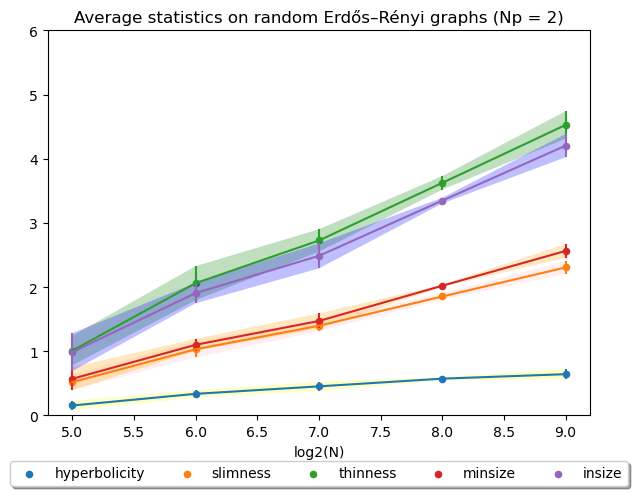

In [4]:
# Results analysis
plt.figure(figsize = [7,5])
Ns = [2**i for i in range(5,10)]
means = np.zeros((len(Ns),5))
stds = np.zeros((len(Ns),5))

for i in range(len(Ns)):
    means[i] = np.mean(avg_results[Ns[i]], axis = 0)
    stds[i] = np.std(avg_results[Ns[i]], axis = 0)
means = means.T
stds = stds.T
legends = ['hyperbolicity', 'slimness', 'thinness', 'minsize', 'insize']
facecolors = ['#00FF00', '#FF9848', '#4A5026', '#26504F', '#265028']
edgecolors = ['yellow', 'pink', 'green', 'orange', 'blue']
markers = ["o", "v", "H", "*", "^"]
# M = len(SLIM[0])
j = 0
for i in range(5):
    x = np.log2(Ns)
    y = np.array(means[i])
    error = np.array(stds[i])
    plt.fill_between(x, y-error, y+error, alpha = 0.25, facecolor = edgecolors[i])
    plt.scatter(x,y, s = 20, label = legends[i])
    plt.errorbar(x,y, error)
plt.title("Average statistics on random Erdős–Rényi graphs (Np = 2)")
plt.xlabel('log2(N)')
plt.ylim([0,6])
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncols = 5)
# plt.savefig("ER2stats.pdf", format="pdf",bbox_inches="tight")
plt.show()

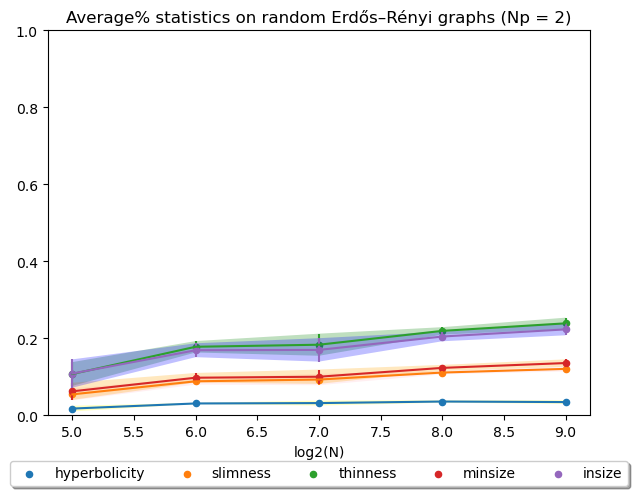

In [5]:
# Results analysis
plt.figure(figsize = [7,5])
means = np.zeros((len(Ns),5))
stds = np.zeros((len(Ns),5))
for i in range(len(Ns)):
    means[i] = 0.5 * np.mean(frac_results[Ns[i]], axis = 0)
    stds[i] = 0.5 * np.std(frac_results[Ns[i]], axis = 0)
means = means.T
stds = stds.T
legends = ['hyperbolicity', 'slimness', 'thinness', 'minsize', 'insize']
facecolors = ['#00FF00', '#FF9848', '#4A5026', '#26504F', '#265028']
edgecolors = ['yellow', 'pink', 'green', 'orange', 'blue']
markers = ["o", "v", "H", "*", "^"]
# M = len(SLIM[0])
j = 0
for i in range(5):
    x = np.log2(Ns)
    y = np.array(means[i])
    error = np.array(stds[i])
    plt.fill_between(x, y-error, y+error, alpha = 0.25, facecolor = edgecolors[i])
    plt.scatter(x,y, s = 20, label = legends[i])
    plt.errorbar(x,y, error)
plt.title("Average% statistics on random Erdős–Rényi graphs (Np = 2)")
plt.xlabel('log2(N)')
plt.ylim([0,1])
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncols = 5)
# plt.savefig("ER2fracs.pdf", format="pdf",bbox_inches="tight")
plt.show()

In [6]:
# To do: compute triangle stats for geodesic triangles